<a href="https://colab.research.google.com/github/asmi2797/Quantitative-Finance/blob/main/Assignment_1_Asmita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

Write a Python script to analyze historical stock data for a NIFTY50 stock from Yahoo Finance for the period from August 1, 2022, to August 1, 2024. The script should:

Install the necessary libraries (numpy, pandas, yfinance, matplotlib).
Download the data for the given period.
Extract the Open, High, Low, Close, Adj Close, and Volume columns.
Calculate and plot the 14-day and 50-day relative strength index (RSI) on the same graph, with different colors for each RSI.
Compute and visualize the daily percentage change in the Closing Prices and plot it as a histogram with appropriate bins.
Create a subplot with three charts:
The first chart should display the daily Closing Prices with 14-day and 50-day RSI.
The second chart should show the daily Volume.
The third chart should display the histogram of daily percentage changes.

Deadline- 11th August 11.59pm

In [ ]:
# Install necessary libraries
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the stock ticker and date range
# Download historical stock data
ticker = 'HDFCBANK.NS'
start_date = '2022-08-01'
end_date = '2024-08-01'
data = yf.download(tickers=ticker,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Extract the relevant columns
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [ ]:
# Calculate the 14-day and 50-day relative strength index (RSI)
def calculate_RSI(data, window):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

RSI_14 = calculate_RSI(data, 14)
RSI_50 = calculate_RSI(data, 50)

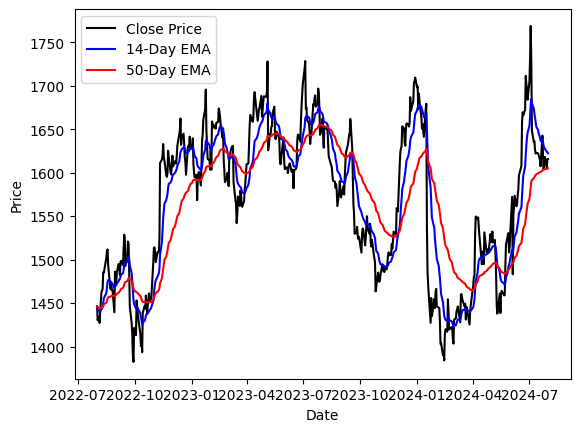

In [ ]:
# Calculate the 14-day and 50-day exponential moving averages (EMAs)
# Plot the Closing Prices with EMAs
data = data[['Close']]

EMA_14= data['Close'].ewm(span=14, adjust=False).mean()
EMA_50= data['Close'].ewm(span=50, adjust=False).mean()

plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index,EMA_14, label='14-Day EMA', color='blue')
plt.plot(data.index,EMA_50, label='50-Day EMA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

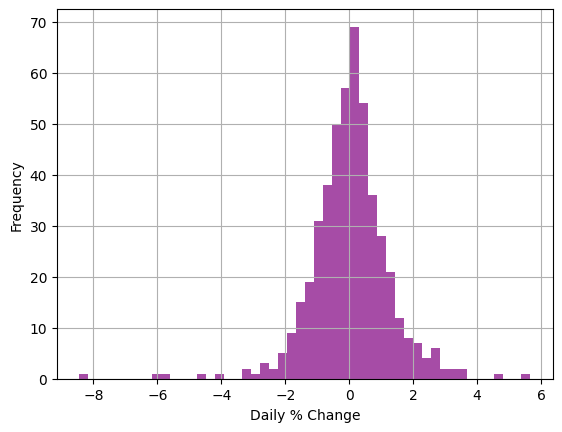

In [ ]:
# Calculate the daily percentage change in Closing Prices
# Plot histogram of daily percentage changes
Daily_Change = data['Close'].pct_change() * 100
plt.hist(Daily_Change.dropna(), bins=50, color='purple', alpha=0.7)

plt.xlabel('Daily % Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

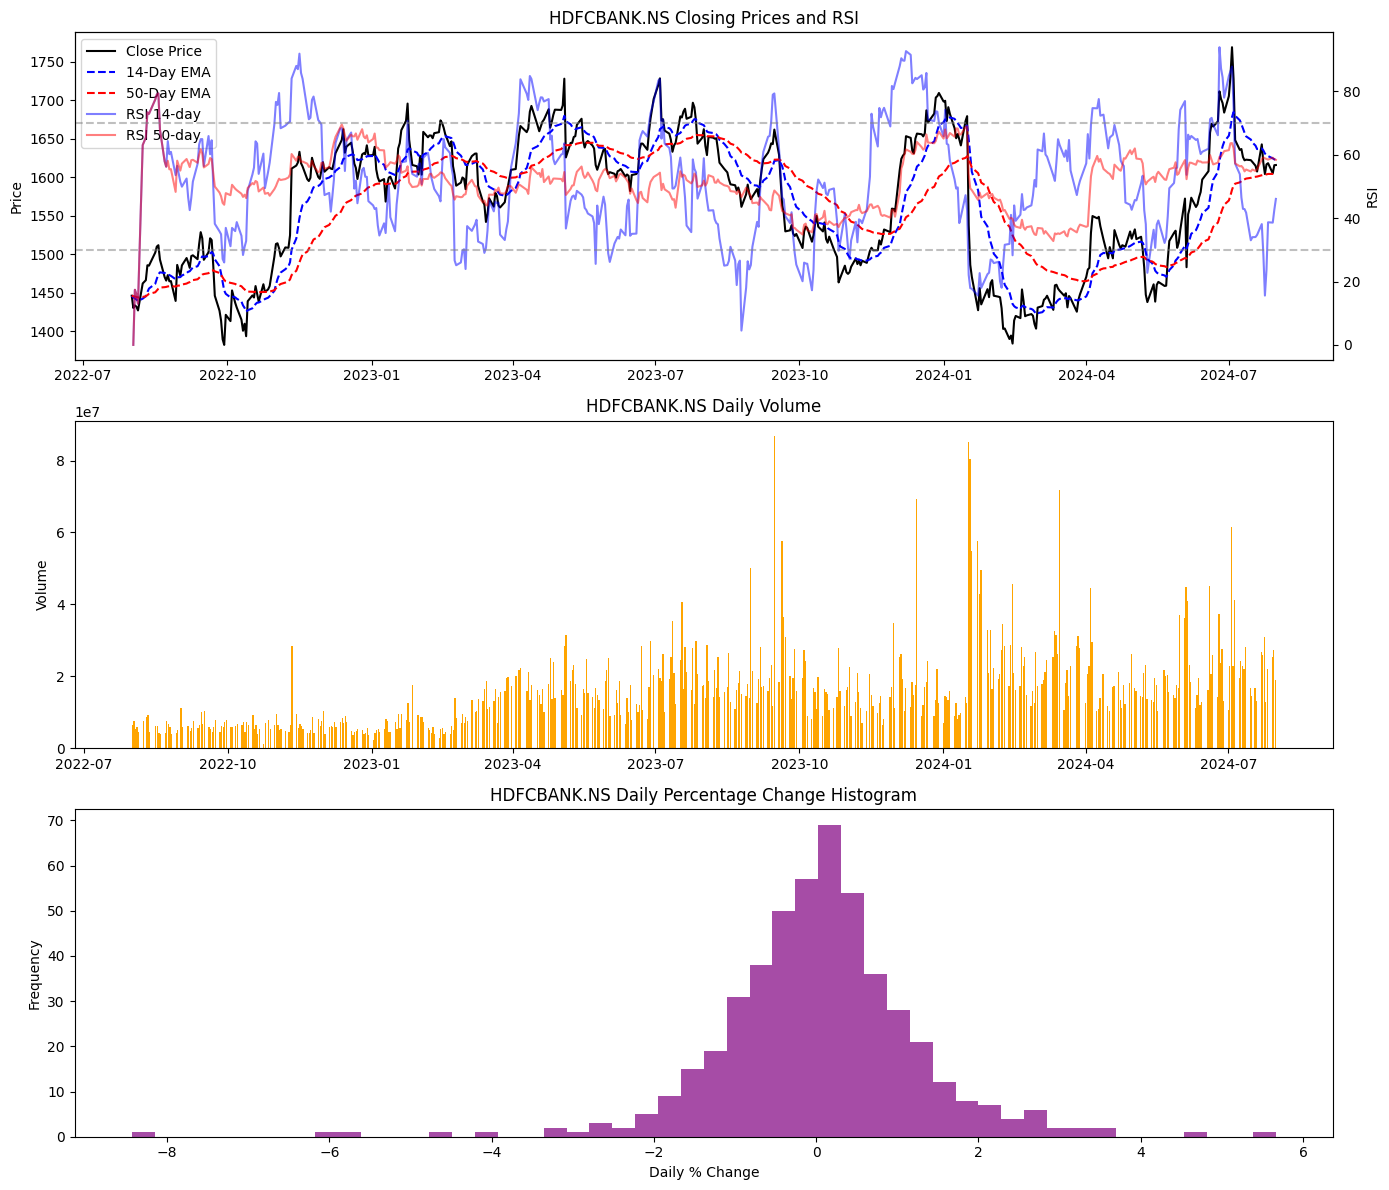

In [ ]:
# Create subplots
# Plot Closing Prices and RSI
# Plot Volume
# Plot histogram of daily percentage changes
# First subplot: Closing Prices and RSI

fig, axs = plt.subplots(3, 1, figsize=(14, 12))

# First subplot: Closing Prices and RSI
axs[0].plot(data.index, data['Close'], label='Close Price', color='black')
axs[0].plot(data.index, EMA_14, label='14-Day EMA', color='blue', linestyle='--')
axs[0].plot(data.index, EMA_50, label='50-Day EMA', color='red', linestyle='--')
axs[0].set_ylabel('Price')
axs[0].set_title(f'{ticker} Closing Prices and RSI')

ax2 = axs[0].twinx()
ax2.plot(data.index, RSI_14, label='RSI 14-day', color='blue', alpha=0.5)
ax2.plot(data.index, RSI_50, label='RSI 50-day', color='red', alpha=0.5)
ax2.set_ylabel('RSI')
ax2.axhline(70, color='grey', linestyle='--', alpha=0.5)
ax2.axhline(30, color='grey', linestyle='--', alpha=0.5)

# Combine legends of the two y-axes
lines, labels = axs[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axs[0].legend(lines + lines2, labels + labels2, loc='upper left')

# Second subplot: Volume (only if 'Volume' column exists)
if 'Volume' in data.columns:
    axs[1].bar(data.index, data['Volume'], color='orange')
    axs[1].set_ylabel('Volume')
    axs[1].set_title(f'{ticker} Daily Volume')
else:
    axs[1].text(0.5, 0.5, 'Volume data not available', fontsize=15, ha='center')
    axs[1].set_title('Volume Data Missing')
    axs[1].axis('off')  # Hide the axis if no volume data is available

# Third subplot: Daily Percentage Change Histogram
axs[2].hist(Daily_Change.dropna(), bins=50, color='purple', alpha=0.7)
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('Daily % Change')
axs[2].set_title(f'{ticker} Daily Percentage Change Histogram')

# Adjust layout and show plot
plt.tight_layout()
plt.show()